# Mass Spring Damper Example
<img src="fig/msd.png" alt="Drawing" style="width: 500px;" align="center"/>

The equation of motion is given as:

$m \ddot{x}(t) + c \dot{x}(t) + k x(t) = u(t)$

You are given the following physical parameters.
* c=2 N/(m/s)
* k=2 N/m
* m=1 kg

## Laplace Method for Matrix Exponential

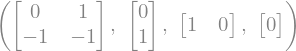

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import sympy

sympy.init_printing()
t = sympy.symbols('t', real=True)
eps = 1e-10  # where to start plotting, since we assume positive t
s = sympy.symbols('s')
c = 1
k = 1

A = sympy.Matrix([[0, 1], [-k, -c]])
B = sympy.Matrix([[0], [1]])
C = sympy.Matrix([[1, 0]])
D = sympy.Matrix([[0]])
(A, B, C, D)

$G(s) = C(sI - A)^{-1}B + D$

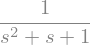

In [13]:
N = (s*sympy.eye(2) - A).inv()
G = (C*N*B + D).expand()
G.simplify()
G = G[0]
G

Remember from the Laplace table:

$\mathcal{L}^{-1}\left[ \dfrac{1}{s - a} \right] = e^{at}$

The same is true for the matrix version of this Laplace transform:

$\mathcal{L}^{-1}\left[ (sI- A)^{-1} \right] = e^{At}$

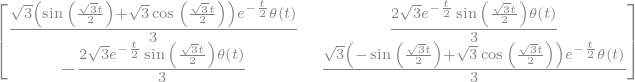

In [14]:
eAt = sympy.inverse_laplace_transform((s*sympy.eye(2) - A).inv(), s, t)
eAt

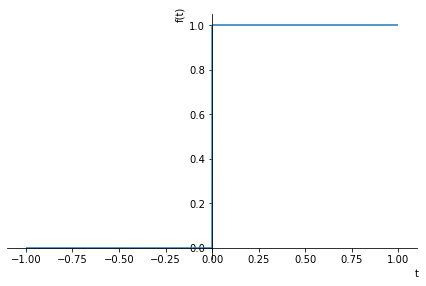

In [15]:
sympy.plot(sympy.Heaviside(t), (t, -1, 1))

## Spectral Method for Matrix Exponential

The approach here will be to use the diagonalization of A.

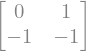

In [16]:
A

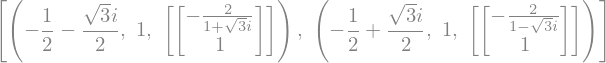

In [17]:
evects = sympy.Matrix.eigenvects(A)
evects

$T = \left[ \xi_1 \xi_2 \right]$

Diagonolization:

$ A = T diag(\lambda_1, \lambda_2) T^{-1}$

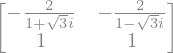

In [18]:
T = sympy.Matrix.hstack(evects[0][2][0], evects[1][2][0])
T

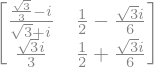

In [19]:
T_inv = T.inv()
T_inv.simplify()
T_inv

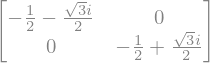

In [20]:
Lambda = sympy.diag(evects[0][0], evects[1][0])
Lambda

Let's check that our diagonalization of A worked as expected.

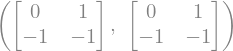

In [21]:
A_check = (T*Lambda*T.inv())
sympy.expand(A_check, complex=True), A

We can calculate the exponential of the diagonal matrix containing the eigen values, it is just the exponential of each element of the diagonal.

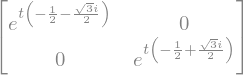

In [22]:
LambdaExp = sympy.diag(sympy.exp(evects[0][0]*t), sympy.exp(evects[1][0]*t))
LambdaExp

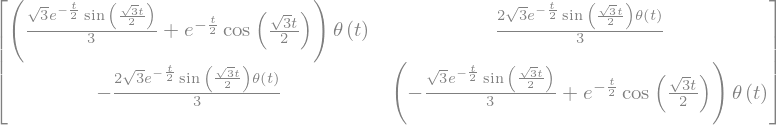

In [23]:
eAt_spec = (T*LambdaExp*T_inv).expand(complex=True)*sympy.Heaviside(t)
eAt_spec

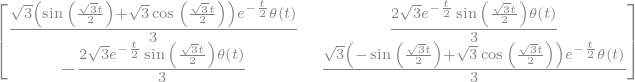

In [24]:
eAt

## Response given initial conditions

$\vec{x} = \begin{bmatrix}x  \\ \dot{x} \end{bmatrix}$

$\vec{x}(t) = e^{At}\vec{x}(0) + \int_0^t e^{A(t - \tau)}  B u(\tau) d\tau$

$\vec{y}(t) = C \vec{x}(t) + D\vec{u}(t)$

In [25]:
x0 = sympy.Matrix([1, 0])
x0

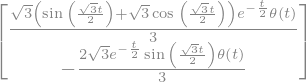

In [26]:
x = eAt*x0
x

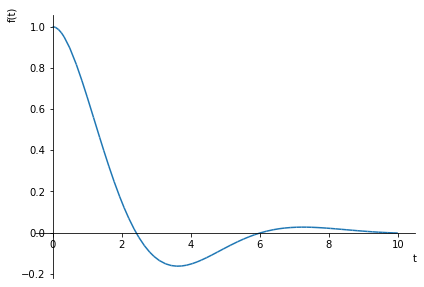

In [27]:
sympy.plot(x[0], (t, eps, 10))

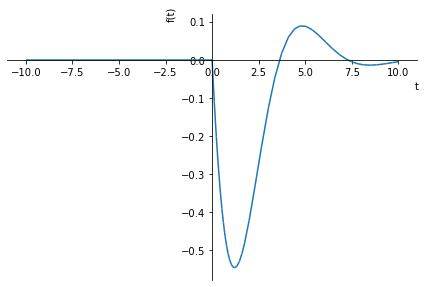

In [28]:
sympy.plot(x[1])

# Final Value Theorem

$G(s) = Y(s)/U(s)$

$\lim\limits_{t \rightarrow \infty} x(t) = \lim\limits_{s \rightarrow 0} s X(s)$

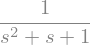

In [29]:
G

## Unit step of magnitude  3

$ X = G\cdot U$

$ X = (X/U)\cdot U$

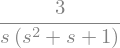

In [30]:
U1 = 3/s
X1 = G*U1
X1

In [31]:
u1 = sympy.inverse_laplace_transform(U1, s, t)
u1

In [32]:
x1_final = sympy.simplify(s*X1).subs(s, 0)
x1_final

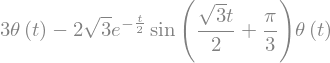

In [33]:
x1 = sympy.inverse_laplace_transform(sympy.apart(X1, full=True), s, t)
x1

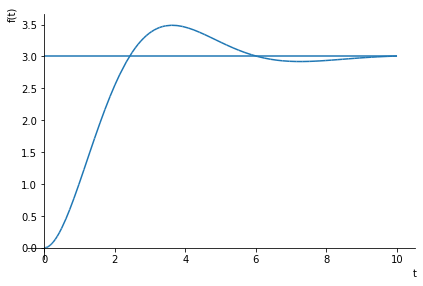

In [34]:
sympy.plot(x1, x1_final, (t, eps, 10))

## Impulse of magnitude 2

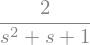

In [35]:
U2 = 2
X2 = G*U2
X2

In [36]:
u2 = sympy.inverse_laplace_transform(U2, s, t)
u2

In [37]:
x2_final = (s*X2).subs(s, 0)
x2_final

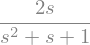

In [38]:
s*X2

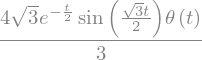

In [39]:
x2 = sympy.inverse_laplace_transform(X2, s, t).expand(complex=True)
x2

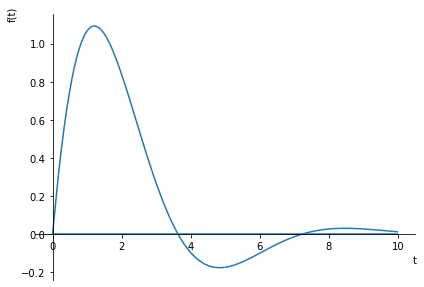

In [40]:
sympy.plot(x2, x2_final, (t, eps, 10))